From https://github.com/Philliec459/Carbonates--Generate-Representative-Thin-Sections-and-Pc-Curves-from-normalized-core-data-using-KNN

1 Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October, 2008.

In [51]:
import pandas as pd
from pathlib import Path
import PIL
from IPython.display import display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
datadir_in = Path('../../data/raw/thin-sections-and-pc-curves-from-core-data/')

In [24]:
df = pd.read_excel(datadir_in / "CO3_TS_Image.xls", header=None)
df.columns = ['id', 'Depth', 'Porosity','Permeability', 'Path']
df

,id,Depth,Porosity,Permeability,Path
0,1,5609.6,0.184526,71.9722,1.PNG
1,2,5612.7,0.134174,0.7077,2.PNG
2,3,5624.0,0.132816,36.5668,3.PNG
3,4,5631.1,0.078867,0.2662,4.PNG
4,5,5639.2,0.057413,0.1231,5.PNG
...,...,...,...,...,...
75,86,4838.2,0.152933,3.0170,86.PNG
76,87,4857.7,0.071304,0.1244,87.PNG
77,88,4885.6,0.140651,55.8650,88.PNG
78,89,4906.3,0.110321,42.5784,89.PNG


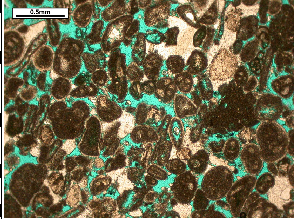

(256, 256, 4) (295, 219) 1.PNG id                     1
Depth             5609.6
Porosity        0.184526
Permeability     71.9722
Path               1.PNG
Name: 0, dtype: object


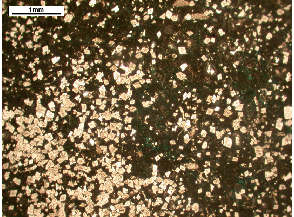

(256, 256, 4) (294, 217) 2.PNG id                     2
Depth             5612.7
Porosity        0.134174
Permeability      0.7077
Path               2.PNG
Name: 1, dtype: object


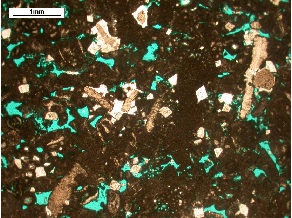

(256, 256, 4) (292, 218) 3.PNG id                     3
Depth               5624
Porosity        0.132816
Permeability     36.5668
Path               3.PNG
Name: 2, dtype: object


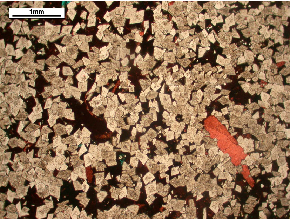

(256, 256, 4) (291, 220) 4.PNG id                      4
Depth              5631.1
Porosity        0.0788671
Permeability       0.2662
Path                4.PNG
Name: 3, dtype: object


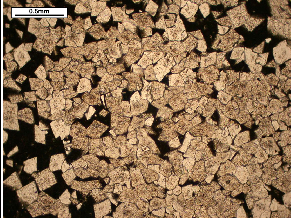

(256, 256, 4) (291, 218) 5.PNG id                      5
Depth              5639.2
Porosity        0.0574133
Permeability       0.1231
Path                5.PNG
Name: 4, dtype: object


(80, 256, 256, 4)

In [59]:
X = []
for i in range(len(df)):
    p = df.Path[i]
    im = PIL.Image.open(datadir_in/p)
    x = np.array(im.resize((256, 256)))
    X.append(x)
    if i<5:
        display(im)
        print(x.shape, im.size, p, df.iloc[i])
X = np.stack(X)
X.shape

(274, 205)